In [1]:
import requests
import pandas as pd
import yfinance as yf
from tqdm import tqdm
import datetime
import time
import requests
import io
import matplotlib.pyplot as plt
import viz

In [ ]:
import requests

url = "https://yfapi.net/v6/finance/quote"

querystring = {"symbols":"AAPL,BTC-USD,EURUSD=X"}

headers = {
    'x-api-key': ""
    }

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

In [2]:
url = "https://yfapi.net/v6/finance/quote"
querystring = {"symbols":"AAPL,BTC-USD,EURUSD=X"}

headers = {
    'x-api-key': "CsJccGCSu032NYa9Zs9nZ80gyhYBreg24k7xm1Gm"
}

response = requests.request("GET", url, headers=headers, params=querystring)
print(response.text)

{"message":"Forbidden","hint":"Sign up for API key https://financeapi.com/tutorial"}


In [3]:
url="https://pkgstore.datahub.io/core/nasdaq-listings/nasdaq-listed_csv/data/7665719fb51081ba0bd834fde71ce822/nasdaq-listed_csv.csv"
s = requests.get(url).content
companies = pd.read_csv(io.StringIO(s.decode('utf-8')))
start = datetime.datetime(2020,2,1)
end = datetime.datetime(2022,3,22)

In [4]:
len(companies['Symbol'].tolist())

2967

In [5]:
companies.head()

,Symbol,Company Name,Security Name,Market Category,Test Issue,Financial Status,Round Lot Size
0,AAIT,iShares MSCI All Country Asia Information Tech...,iShares MSCI All Country Asia Information Tech...,G,N,N,100.0
1,AAL,"American Airlines Group, Inc.","American Airlines Group, Inc. - Common Stock",Q,N,N,100.0
2,AAME,Atlantic American Corporation,Atlantic American Corporation - Common Stock,G,N,N,100.0
3,AAOI,"Applied Optoelectronics, Inc.","Applied Optoelectronics, Inc. - Common Stock",G,N,N,100.0
4,AAON,"AAON, Inc.","AAON, Inc. - Common Stock",Q,N,N,100.0


In [6]:
#symbols = companies['Symbol'].tolist()

symbols = ["AAPL", "GOOG"]

stock_final = pd.DataFrame()
for i in tqdm(symbols):  
    #print( str(Symbols.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)  
    try:
        stock = []
        stock = yf.download(i,start=start, end=end, progress=False)
        print(len(stock))
        if len(stock) == 0:
            None
        else:
            stock['Name']=i
            stock_final = stock_final.append(stock,sort=False)
    except Exception:
        None

 50%|███████████████████████████████████████████████████████████████████████▌                                                                       | 1/2 [00:00<00:00,  3.22it/s]

538


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  3.86it/s]

538


In [7]:
stock_final.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2020-02-03,76.074997,78.372498,75.555000,77.165001,75.938812,173788400,AAPL
2020-02-04,78.827499,79.910004,78.407501,79.712502,78.445831,136616400,AAPL
2020-02-05,80.879997,81.190002,79.737503,80.362503,79.085503,118826800,AAPL
2020-02-06,80.642502,81.305000,80.065002,81.302498,80.010574,105425600,AAPL
2020-02-07,80.592499,80.849998,79.500000,80.007500,78.923012,117684000,AAPL


In [8]:
stock_final["Name"].unique()

array(['AAPL', 'GOOG'], dtype=object)

In [9]:
stock_final[stock_final["Name"] == "AAPL"].index

DatetimeIndex(['2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-10', '2020-02-11', '2020-02-12',
               '2020-02-13', '2020-02-14',
               ...
               '2022-03-08', '2022-03-09', '2022-03-10', '2022-03-11',
               '2022-03-14', '2022-03-15', '2022-03-16', '2022-03-17',
               '2022-03-18', '2022-03-21'],
              dtype='datetime64[ns]', name='Date', length=538, freq=None)

In [10]:
#list(range(0, 538))

/Users/sresreek1/code/finance-math/viz.py:97: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(X_, rotation=90, ha="right", fontsize=11)


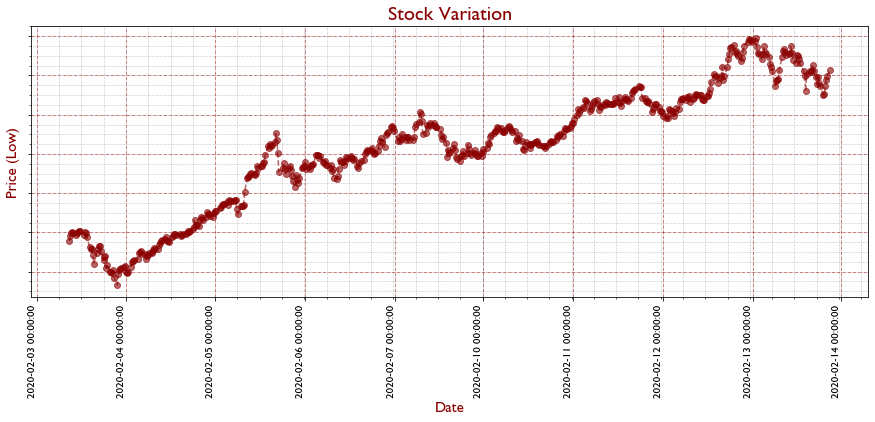

In [13]:
f, axe = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
viz.plot(stock_final[stock_final["Name"] == "AAPL"].index, 
         stock_final[stock_final["Name"] == "AAPL"]["Low"],
         ax=axe,
         title="Stock Variation",
         xlabel="Date",
         ylabel="Price (Low)", 
         ls="--", 
         marker="o", 
         color="darkred")